# Step 5: Flux Footprint Analysis

The calculation of a 2d flux footprint makes it possible to estimate the size of the surface that contributes to the measured flux. This also allows to analyze whether changes in the flux result from a change in the footprint (e.g. surface composition, vegetation, surface roughness). Here the flux footprint parametrization according to Kljun et al., 2015 is used. <br>
The mathematical idea for deriving a flux footprint parametrization is to express the flux ($F_c$) as integral over the distribution of its sinks and sources ($S_c$) times a transfer function $f$ (the flux footprint):
$$
    F_c(0,0,z) = \int\int S_c(x,y) f(x,y) \:dx\,dy
$$
By treating streamwise and crosswise velocity independently, the footprint can be expressed as product of the crosswind-integrated footprint ($\overline{f^y}(x)$ which is then only a function of $x$) and a function expressing the crosswind dispersion ($D_y$) through
$$
    f(x,y) = \overline{f^y}(x)D_y.
$$
(This assumption leads to a symmtric footprint in crosswind direction.) For further derivations a concrete footprint model has to be applied, which is in Kljun et al., 2015 an advanced Lagrangian particle dispersion model (LPDM-B) based on 3d particle backtracking between surface and boundary layer height $h$ that is valid for steady flows under all stabilities.

In [1]:
#load Reddy package
install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE)
library(Reddy)
kap=function() return(0.4)

#read in processed example data
dat=readRDS("../data/ec-data_30min_processed/processed_data_example.rds")

#select file
i=8 #daytime example

Installing package into ‘/home/lauracma/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



### Calculate 2d flux footprint estimate with `calc_flux_footprint`
The function `calc_flux_footprint`uses the 2d flux footprint parametrization (FFP) according to Kljun et al., 2015 to calculate the footprint based on measurement height `zm`, mean horizontal wind speed `u_mean`, boundary layer height `h`, Obukhov length `L` (`calc_L`), standard deviation of cross-wind component `v_sd` and either friction velocity `ustar`(`calc_ustar`) or surface roughness length `z0` in a resolution given by `nres`. The boundary layer height can be taken from e.g. ERA5.

In [2]:
ustar=calc_ustar(dat$cov_uw,dat$cov_vw)
L=calc_L(ustar,dat$T_mean,dat$cov_wT)
zm=4.4
h=700

ffp=calc_flux_footprint(zm,dat$u_mean[i],h,L[i],dat$v_sd[i],ustar[i])
str(ffp)

List of 9
 $ xmax          : num 23
 $ x             : num [1:999] 4.38 5.17 5.96 6.76 7.55 ...
 $ fy_mean       : num [1:999] 3.43e-20 3.60e-10 5.56e-07 1.85e-05 1.37e-04 ...
 $ x2d           : num [1:1499, 1:999] 4.38 4.38 4.38 4.38 4.38 ...
 $ y2d           : num [1:1499, 1:999] -592 -591 -590 -589 -589 ...
 $ f2d           : num [1:999, 1:1499] 0 0 0 0 0 0 0 0 0 0 ...
 $ xcontour      :List of 9
  ..$ : num [1:1573] 6.76 6.75 6.72 6.7 6.69 ...
  ..$ : num [1:815] 7.55 7.48 7.42 7.38 7.35 ...
  ..$ : num [1:543] 8.34 8.25 8.16 8.08 8.03 ...
  ..$ : num [1:397] 9.13 9.03 8.91 8.81 8.73 ...
  ..$ : num [1:307] 9.92 9.78 9.64 9.52 9.43 ...
  ..$ : num [1:235] 10.7 10.7 10.5 10.3 10.2 ...
  ..$ : num [1:181] 11.5 11.3 11.2 11 11 ...
  ..$ : num [1:133] 12.3 12.2 12.1 12 12 ...
  ..$ : num [1:87] 13.9 13.8 13.7 13.7 13.7 ...
 $ ycontour      :List of 9
  ..$ : num [1:1573] -2.39 -2.37 -1.58 -0.79 0 ...
  ..$ : num [1:815] -4.56 -3.95 -3.16 -2.37 -1.58 ...
  ..$ : num [1:543] -6.14 -5.53 

### Plotting of flux footprint with `plot_flux_footprint`

The function `plot_flux_footprint` takes as input an obeject returned by `calc_flux_footprint` and plots the cross-wind integrated footprint and the 2d footprint.

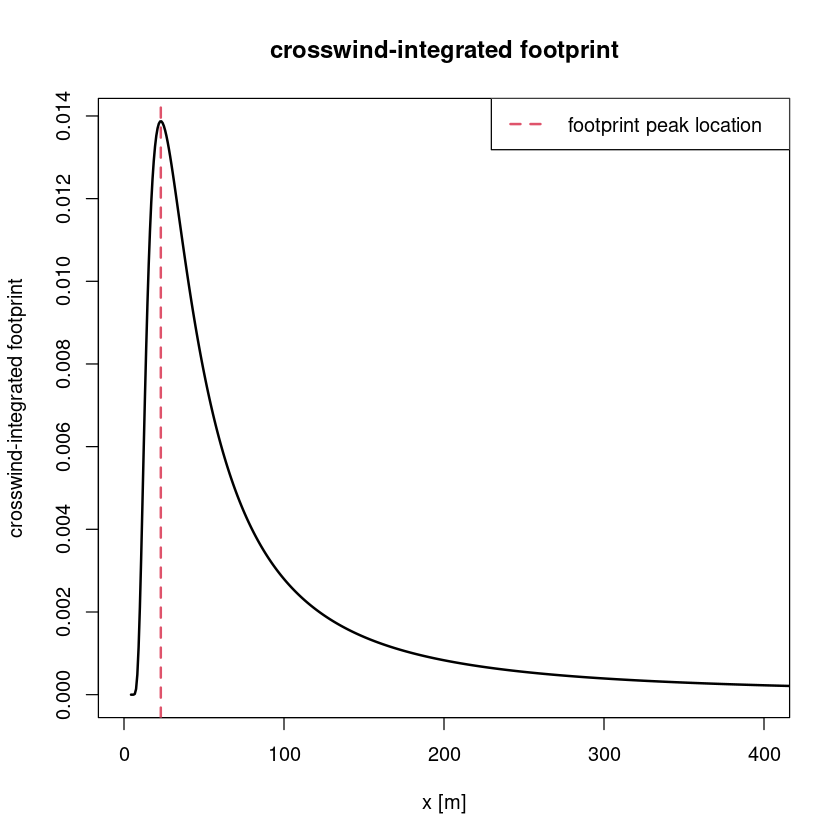

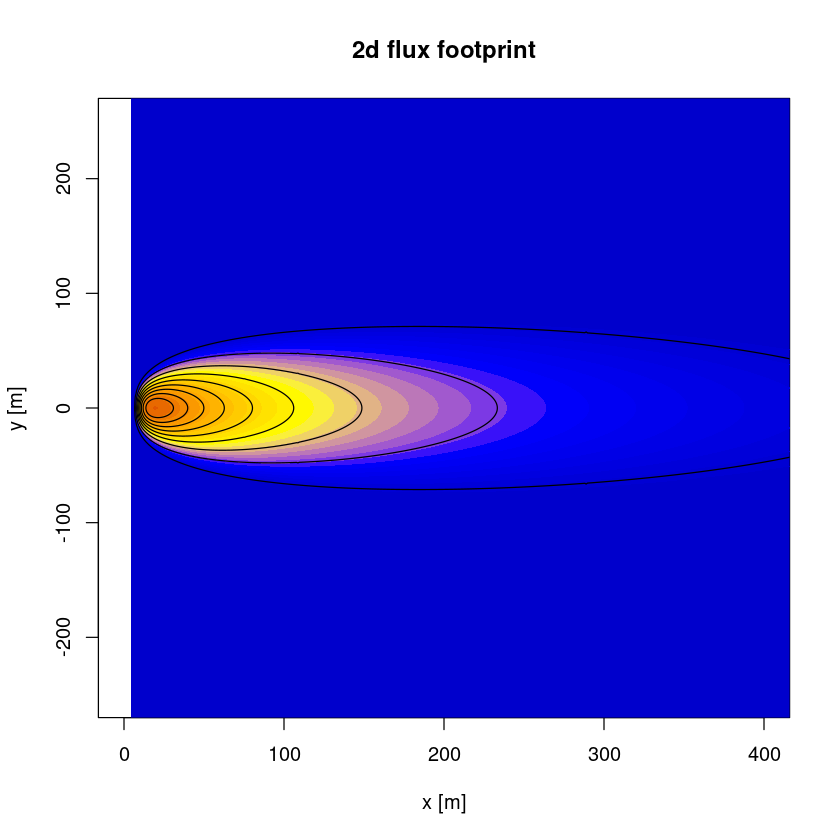

In [71]:
plot_flux_footprint(ffp)

Footprint climatologies can be create as composite footprints by averaging over several FFP calculations. 

### Literature
- Kljun, N., Calanca, P., Rotach, M. W., and Schmid, H. P.: A Simple Two-Dimensional Parameterisation for Flux Footprint Prediction (FFP),
Geoscientific Model Development, 8, 3695–3713, https://doi.org/10.5194/gmd-8-3695-2015, 2015.
- Pirk, N., Aalstad, K., Yilmaz, Y. A., Vatne, A., Popp, A. L., Horvath, P.,
Bryn, A., Vollsnes, A. V., Westermann, S., Berntsen, T. K., Stordal, F., and
Tallaksen, L. M. (2023). Snow-vegetation-atmosphere interactions in alpine
tundra. Biogeosciences, 20:2031–2047.